In [1]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('Minnesota Birds.csv')
birds.head()

,Name,Scientific Name,Indicator or Other Notes,Category,State,Kingdom,Phylum,Class,Order,Family,Genus,Conservation status,Length Min (cm),Length Max (cm),Body Mass Min (g),Body Mass Max (g),Wingspan Min (cm),Wingspan Max (cm)
0,Black-bellied whistling-duck,Dendrocygna autumnalis,(A),"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,(A),"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


you can quickly look at the way data is distributed by using a scatter plot 

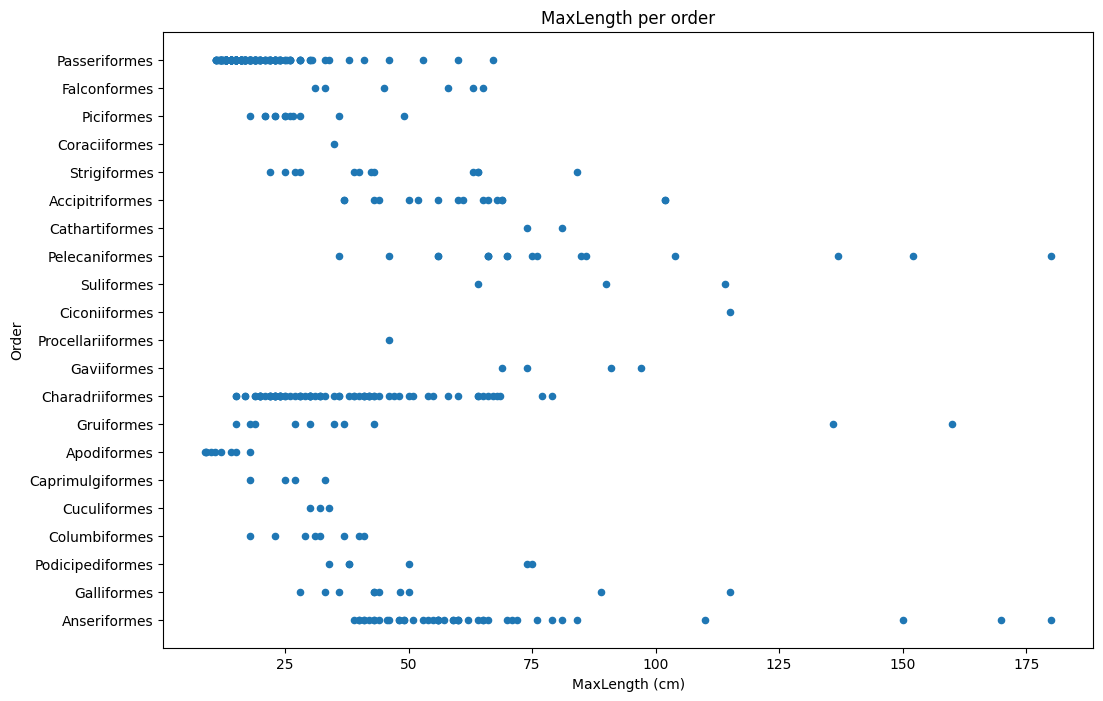

In [7]:
birds.plot(kind='scatter', x='Length Max (cm)', y = 'Order', figsize=(12,8))

plt.title('MaxLength per order')
plt.xlabel('MaxLength (cm)')
plt.ylabel('Order')

plt.show()

This gives an overview of the general distribution of body length per bird Order, but it is not the optimal way to display true distributions. That task is usually handled by creating a Histogram.

Working with histograms

Matplotlib offers very good ways to visualize data distribution using Histograms. This type of chart is like a bar chart where the distribution can be seen via a rise and fall of the bars. To build a histogram, you need numeric data. To build a Histogram, you can plot a chart defining the kind as 'hist' for Histogram. This chart shows the distribution of MaxBodyMass for the entire dataset's range of numeric data. By dividing the array of data it is given into smaller bins, it can display the distribution of the data's values:

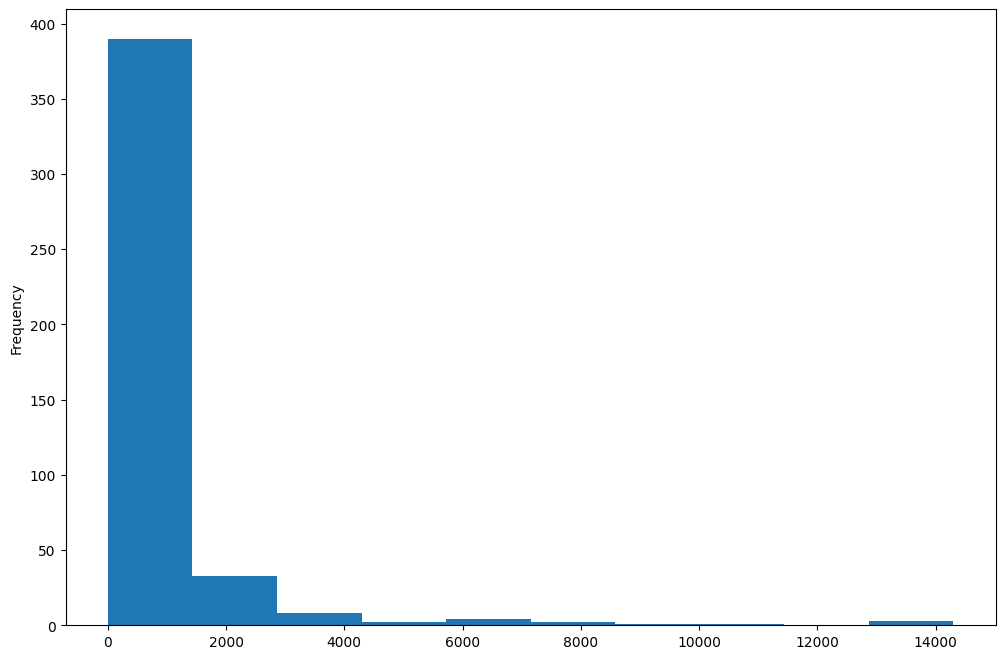

In [8]:
birds['Body Mass Max (g)'].plot(kind='hist',bins=10,figsize=(12,8))
plt.show()

As you can see, most of the 400+ birds in this dataset fall in the range of under 2000 for their Max Body Mass. Gain more insight into the data by changing the bins parameter to a higher number, something like 30:

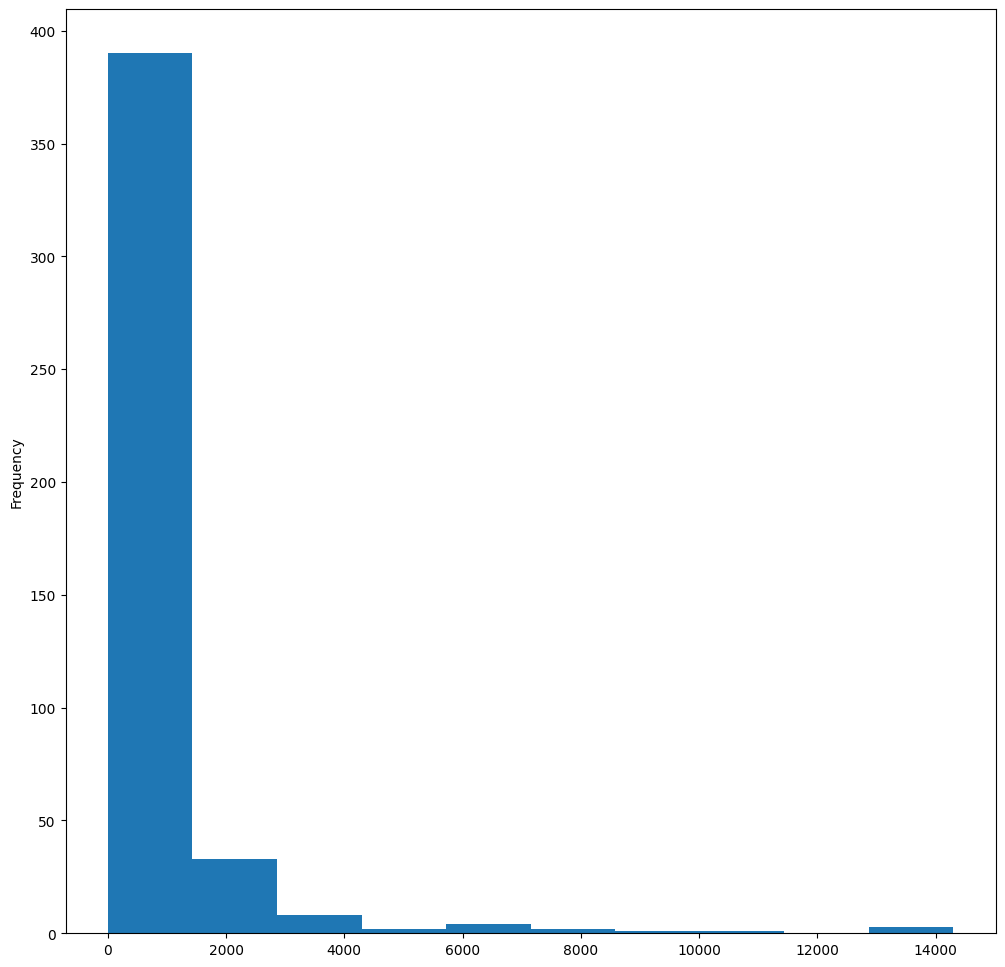

In [9]:
birds['Body Mass Max (g)'].plot(kind= 'hist', bins=10, figsize=(12,12))
plt.show()

This chart shows the distribution in a bit more granular fashion. A chart less skewed to the left could be created by ensuring that you only select data within a given range:

Filter your data to get only those birds whose body mass is under 60, and show 40 bins:

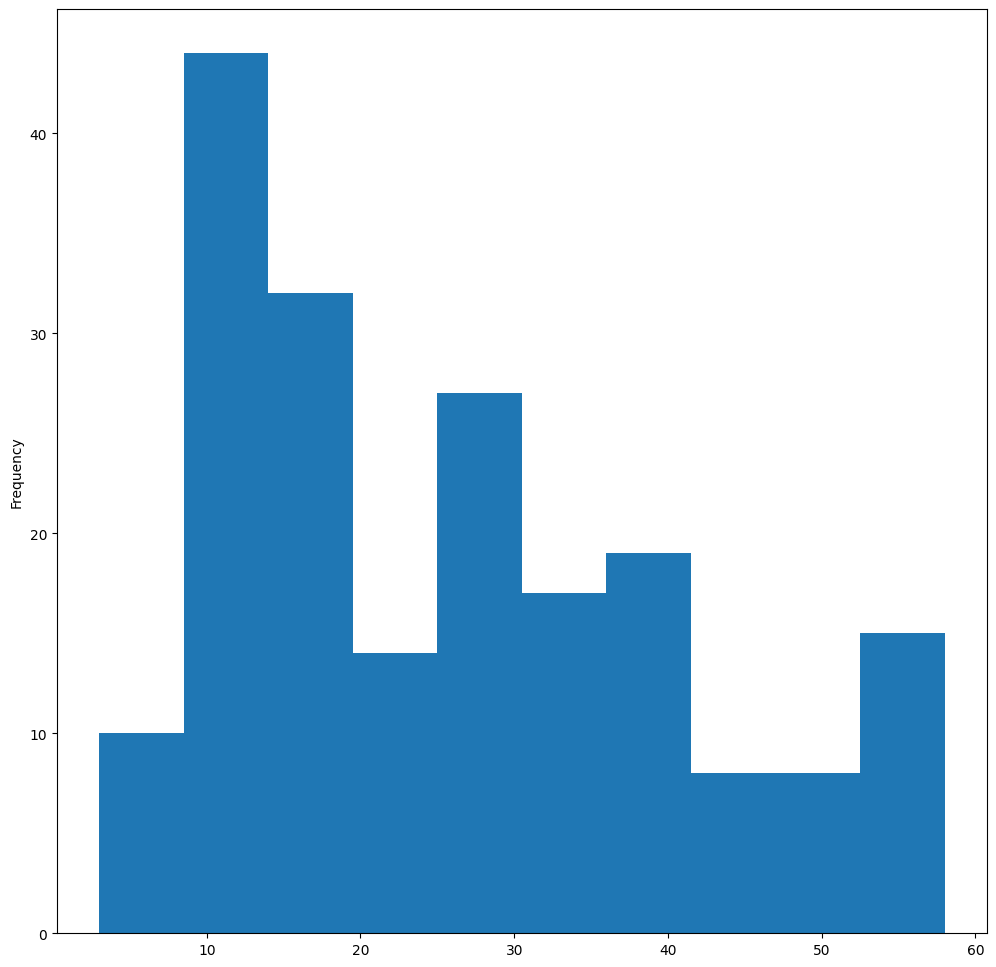

In [13]:
filteredBirds = birds[(birds['Body Mass Max (g)'] > 1) & (birds['Body Mass Max (g)'] < 60)] 
filteredBirds['Body Mass Max (g)'].plot(kind='hist', bins= 10, figsize=(12,12))
plt.show()



The histogram offers some nice color and labeling enhancements to try as well:

We create 2D histogram to compare the relationship between two distributions. We compare MaxBodyMass vs. MaxLength. Matplotlib offers a built-in way to show convergence using brighter colors:

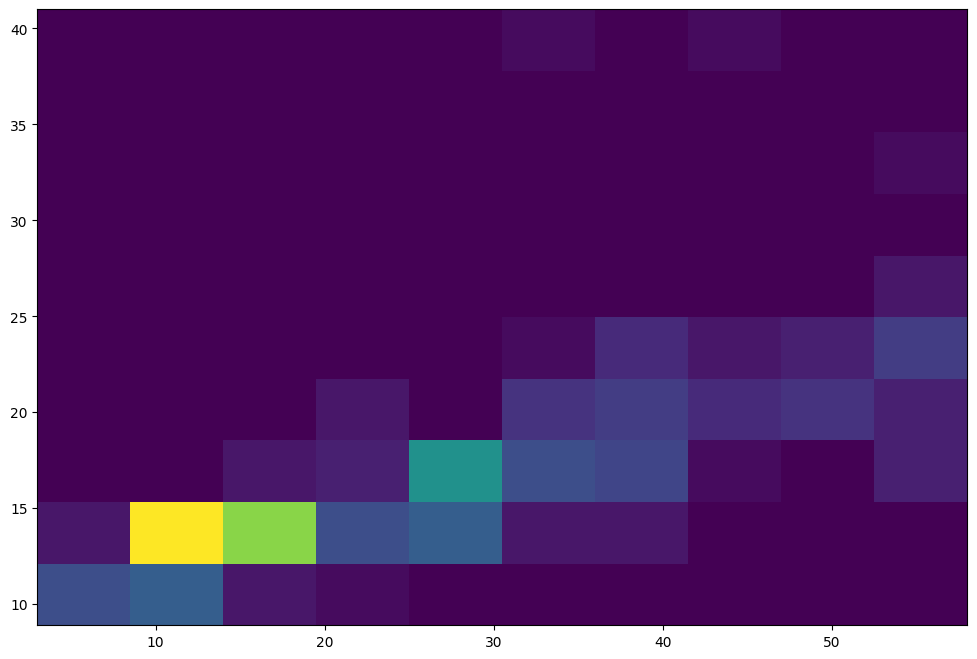

In [14]:
x = filteredBirds['Body Mass Max (g)']
y = filteredBirds['Length Max (cm)']

fig,ax = plt.subplots(figsize=(12,8))
hist = ax.hist2d(x, y)

There appears to be an expected correlation between these two elements along an expected axis, with one particularly strong point of convergence:

Histograms work well by default for numeric data. What if you need to see distributions according to text data?

Explore the dataset for distributions using text data
This dataset also includes good information about the bird category and its genus, species, and family as well as its conservation status. Let's dig into this conservation information. What is the distribution of the birds according to their conservation status?

✅ In the dataset, several acronyms are used to describe conservation status. These acronyms come from the IUCN Red List Categories, an organization that catalogs species' status.

CR: Critically Endangered
EN: Endangered
EX: Extinct
LC: Least Concern
NT: Near Threatened
VU: Vulnerable
These are text-based values so you will need to do a transform to create a histogram. Using the filteredBirds dataframe, display its conservation status alongside its Minimum Wingspan. What do we see?

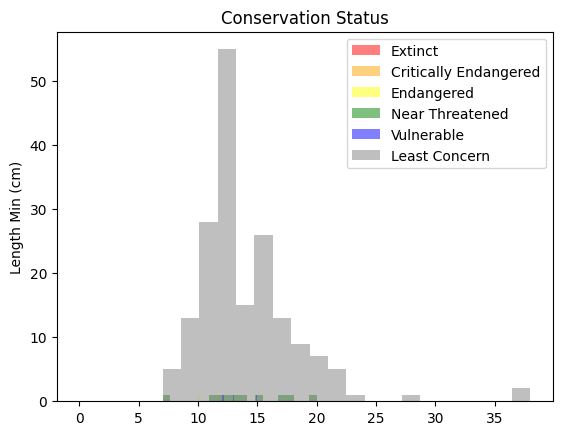

In [18]:
x1 = filteredBirds.loc[filteredBirds['Conservation status'] == 'EX', 'Length Min (cm)']
x2 = filteredBirds.loc[filteredBirds['Conservation status'] == 'CR', 'Length Min (cm)']
x3 = filteredBirds.loc[filteredBirds['Conservation status'] == 'EN', 'Length Min (cm)']
x4 = filteredBirds.loc[filteredBirds['Conservation status'] == 'NT', 'Length Min (cm)']
x5 = filteredBirds.loc[filteredBirds['Conservation status'] == 'VU', 'Length Min (cm)']
x6 = filteredBirds.loc[filteredBirds['Conservation status'] == 'LC', 'Length Min (cm)']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Length Min (cm)')
plt.legend()

Density plots
You may have noticed that the histograms we have looked at so far are 'stepped' and do not flow smoothly in an arc. To show a smoother density chart, you can try a density plot.

To work with density plots, familiarize yourself with a new plotting library, Seaborn.

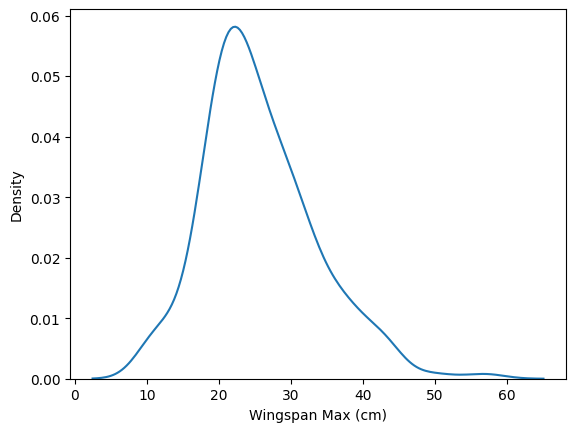

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['Wingspan Max (cm)'])
plt.show()

If you wanted to revisit that jagged MaxBodyMass line in the second chart you built, you could smooth it out very well by recreating it using this method:

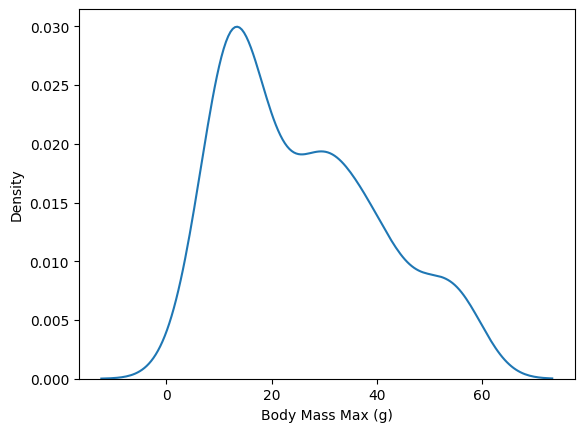

In [20]:
sns.kdeplot(filteredBirds['Body Mass Max (g)'])
plt.show()

If you wanted a smooth, but not too smooth line, edit the bw_adjust parameter:

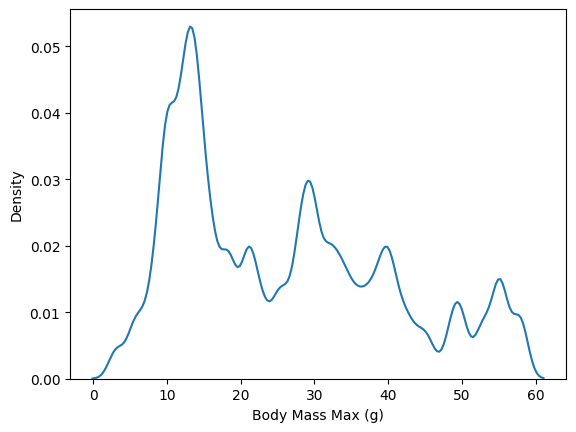

In [21]:
sns.kdeplot(filteredBirds['Body Mass Max (g)'], bw_adjust=.2)
plt.show()

This type of chart offers beautifully explanatory visualizations. With a few lines of code, for example, you can show the max body mass density per bird Order:

C:\Users\toshiba\AppData\Local\Temp\ipykernel_22640\1620774722.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='Body Mass Max (g)', ylabel='Density'>

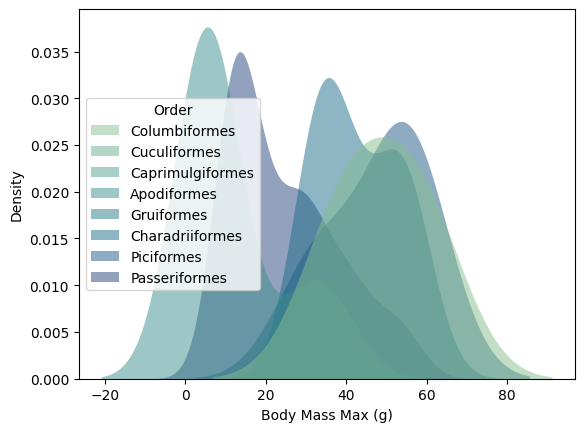

In [22]:
sns.kdeplot(
    data=filteredBirds, x='Body Mass Max (g)', hue='Order',
    fill=True, common_norm=False, palette='crest',
    alpha=.5, linewidth=0,
)

You can also map the density of several variables in one chart. Text the MaxLength and MinLength of a bird compared to their conservation status:

C:\Users\toshiba\AppData\Local\Temp\ipykernel_22640\2772509159.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x='Length Min (cm)', y='Length Max (cm)',  hue='Conservation status')


<Axes: xlabel='Length Min (cm)', ylabel='Length Max (cm)'>

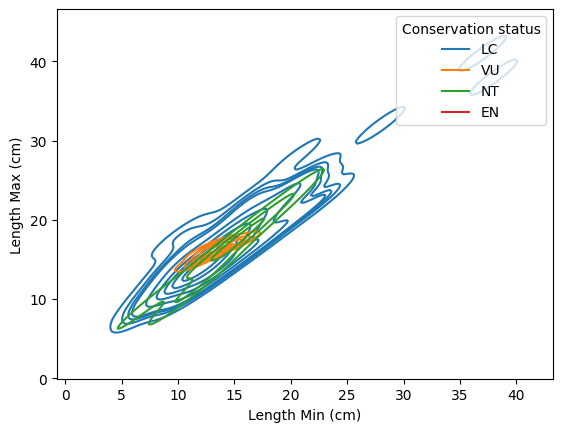

In [24]:
sns.kdeplot(data=filteredBirds, x='Length Min (cm)', y='Length Max (cm)',  hue='Conservation status')